# **Imports**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
%matplotlib inline

In [51]:
uploaded = files.upload()

data=pd.read_csv('first_project.csv')

Saving first_project.csv to first_project (3).csv


In [52]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

# checking null values and data types

In [53]:
print(data.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

# Removing whitespaces from column names

In [55]:
data.columns = data.columns.str.strip().str.replace(' ', '_')

In [56]:
data.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

# Converting date into correct form

In [57]:
data['date_of_reservation'] = pd.to_datetime(data['date_of_reservation'], format='mixed', errors='coerce')

In [58]:
data.head()

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled


# Checking Outliers using IQR

In [59]:
Q1 = data['lead_time'].quantile(0.25)
Q3 = data['lead_time'].quantile(0.75)
IQR = Q3 - Q1
df = data[(data['lead_time'] >= Q1 - 1.5 * IQR) & (data['lead_time'] <= Q3 + 1.5 * IQR)]
outliers = data[(data['lead_time'] < Q1 - 1.5 * IQR) | (data['lead_time'] > Q3 + 1.5 * IQR)]
print(outliers[['lead_time']].head())


     lead_time
5          346
96         320
118        443
120        317
170        317


<Axes: ylabel='lead_time'>

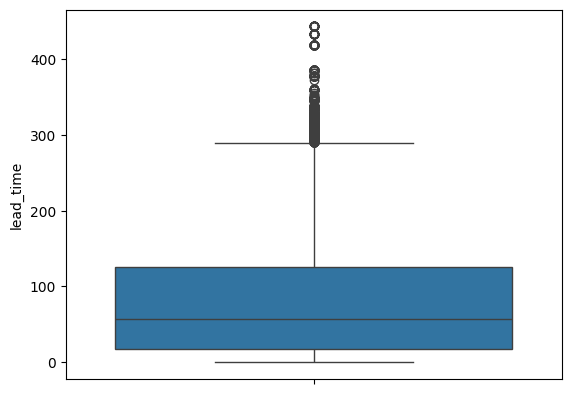

In [60]:
sns.boxplot(data=data, y='lead_time')


In [61]:
Q1 = data['average_price'].quantile(0.25)
Q3 = data['average_price'].quantile(0.75)
IQR = Q3 - Q1
df = data[(data['average_price'] >= Q1 - 1.5 * IQR) & (data['average_price'] <= Q3 + 1.5 * IQR)]
outliers = data[(data['average_price'] < Q1 - 1.5 * IQR) | (data['average_price'] > Q3 + 1.5 * IQR)]
print(outliers[['average_price']].head())

     average_price
60          258.00
63            0.00
114         184.24
127         190.80
145           0.00


<Axes: ylabel='average_price'>

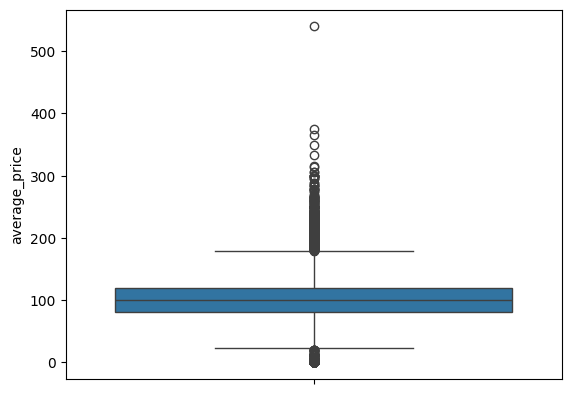

In [62]:
sns.boxplot(data=data, y='average_price')


In [63]:
df.head()

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled


# Feature Engineering


In [64]:
#choose the columns that help for our model
df = df.drop(['Booking_ID'], axis=1) # not important
# Extract from date of reservation information like year , day ,month
df['year'] = df['date_of_reservation'].dt.year
df['month'] = df['date_of_reservation'].dt.month
df['day'] = df['date_of_reservation'].dt.day


In [65]:
df['total_guests'] = df['number_of_adults'] + df['number_of_children'] # new column to get total guests per reservation
df.drop('number_of_adults', axis=1, inplace=True)
df.drop('number_of_children', axis=1, inplace=True)


In [66]:
df.columns

Index(['number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'year', 'month', 'day',
       'total_guests'],
      dtype='object')

# Encoding the categorical data into numerical

In [67]:
df['booking_status']=df['booking_status'].replace("Not_Canceled",1)
df['booking_status']=df['booking_status'].replace("Canceled",0)

In [68]:
df['booking_status'].head()

,booking_status
0,1
1,1
2,0
3,0
4,0


In [69]:
df['market_segment_type']=df['market_segment_type'].replace("Online",1)
df['market_segment_type']=df['market_segment_type'].replace("Offline",0)

df['room_type']=df['room_type'].replace("Room_Type 1",1)
df['room_type']=df['room_type'].replace("Room_Type 2",2)
df['room_type']=df['room_type'].replace("Room_Type 3",3)
df['room_type']=df['room_type'].replace("Room_Type 4",4)

df['type_of_meal']=df['type_of_meal'].replace("Meal Plan 1",1)
df['type_of_meal']=df['type_of_meal'].replace("Meal Plan 2",2)
df['type_of_meal']=df['type_of_meal'].replace("Not Selected",0)


In [70]:
data.head()


,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled


In [71]:
# Extract from date of reservation information like year , day ,month
df['year'] = df['date_of_reservation'].dt.year
df['month'] = df['date_of_reservation'].dt.month
df['day'] = df['date_of_reservation'].dt.day
df.drop('date_of_reservation', axis=1, inplace=True)

In [72]:
df.head()

,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,booking_status,year,month,day,total_guests
0,2,5,1,0,1,224,0,0,0,0,88.00,0,1,2015.0,10.0,2.0,2
1,1,3,0,0,1,5,1,0,0,0,106.68,1,1,2018.0,11.0,6.0,1
2,1,3,1,0,1,1,1,0,0,0,50.00,0,0,2018.0,2.0,28.0,3
3,0,2,1,0,1,211,1,0,0,0,100.00,1,0,2017.0,5.0,20.0,1
4,1,2,0,0,1,48,1,0,0,0,77.00,0,0,2018.0,4.0,11.0,1


In [73]:
df.corr(numeric_only=True)['booking_status'].sort_values(ascending=False)


,booking_status
booking_status,1.000000
special_requests,0.246580
repeated,0.101588
car_parking_space,0.084102
P-not-C,0.055059
P-C,0.031147
month,0.008097
day,-0.009752
type_of_meal,-0.047502
number_of_weekend_nights,-0.054209


# Train Test Split

In [74]:
from sklearn.model_selection import train_test_split

X = df.drop('booking_status', axis=1)
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
